# Lab 6 - model comparison

In [1]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
F = len("Robert")
L = len("Koziarski")
N = (F + L) * 100

In [3]:
%%writefile code_1.stan

data {
    int<lower=1> N;
}

generated quantities {
    real theta = 0.01;
    array[N] real y;

    for (i in 1:N) {
        if (bernoulli_rng(theta)) {
            y[i] = normal_rng(10, 10);
        }
        else {
            y[i] = normal_rng(0, 1);
        }
    }
}

Writing code_1.stan


In [5]:
%%writefile code_2.stan

data {
    int<lower=1> N;
}

generated quantities {
    matrix[N, 3] X;

    {   
        vector [N] zeros = rep_vector(0, N);
        for (j in 1:3) {
            X[:, j] = to_vector(normal_rng(zeros, 1));    
        }
    }

    vector[3] beta;
    beta = [2, 1, 0.5]';
    
    array[N] real y;
    y = normal_rng(X * beta, 1);
}

Writing code_2.stan


In [10]:
code_1 = CmdStanModel(stan_file="code_1.stan")
code_2 = CmdStanModel(stan_file="code_2.stan")

data_gen = {'N': N}

data_1 = code_1.sample(data=data_gen, 
                       iter_sampling=1, 
                       iter_warmup=0, 
                       chains=1, 
                       seed=16072023)
data_2 = code_2.sample(data=data_gen, 
                       iter_sampling=1, 
                       iter_warmup=0, 
                       chains=1, 
                       seed=16072023)

INFO:cmdstanpy:found newer exe file, not recompiling


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [11]:
df_1 = data_1.draws_pd()
df_2 = data_2.draws_pd()

In [12]:
df_1.describe()

,lp__,accept_stat__,theta,y[1],y[2],y[3],y[4],y[5],y[6],y[7],...,y[1491],y[1492],y[1493],y[1494],y[1495],y[1496],y[1497],y[1498],y[1499],y[1500]
count,1.0,1.0,1.00,1.00000,1.000000,1.0000,1.000000,1.000000,1.00000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.00000
mean,0.0,0.0,0.01,1.07561,0.111562,-1.1385,0.047741,-0.073668,-0.83485,-0.476626,...,-1.61657,-0.210718,-0.642017,0.779664,1.10754,0.273873,-1.53413,0.091397,0.643759,1.11994
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.0,0.0,0.01,1.07561,0.111562,-1.1385,0.047741,-0.073668,-0.83485,-0.476626,...,-1.61657,-0.210718,-0.642017,0.779664,1.10754,0.273873,-1.53413,0.091397,0.643759,1.11994
25%,0.0,0.0,0.01,1.07561,0.111562,-1.1385,0.047741,-0.073668,-0.83485,-0.476626,...,-1.61657,-0.210718,-0.642017,0.779664,1.10754,0.273873,-1.53413,0.091397,0.643759,1.11994
50%,0.0,0.0,0.01,1.07561,0.111562,-1.1385,0.047741,-0.073668,-0.83485,-0.476626,...,-1.61657,-0.210718,-0.642017,0.779664,1.10754,0.273873,-1.53413,0.091397,0.643759,1.11994
75%,0.0,0.0,0.01,1.07561,0.111562,-1.1385,0.047741,-0.073668,-0.83485,-0.476626,...,-1.61657,-0.210718,-0.642017,0.779664,1.10754,0.273873,-1.53413,0.091397,0.643759,1.11994
max,0.0,0.0,0.01,1.07561,0.111562,-1.1385,0.047741,-0.073668,-0.83485,-0.476626,...,-1.61657,-0.210718,-0.642017,0.779664,1.10754,0.273873,-1.53413,0.091397,0.643759,1.11994


In [13]:
df_1.head(5)

,lp__,accept_stat__,theta,y[1],y[2],y[3],y[4],y[5],y[6],y[7],...,y[1491],y[1492],y[1493],y[1494],y[1495],y[1496],y[1497],y[1498],y[1499],y[1500]
0,0.0,0.0,0.01,1.07561,0.111562,-1.1385,0.047741,-0.073668,-0.83485,-0.476626,...,-1.61657,-0.210718,-0.642017,0.779664,1.10754,0.273873,-1.53413,0.091397,0.643759,1.11994


In [14]:
df_2.describe()

,lp__,accept_stat__,"X[1,1]","X[2,1]","X[3,1]","X[4,1]","X[5,1]","X[6,1]","X[7,1]","X[8,1]",...,y[1491],y[1492],y[1493],y[1494],y[1495],y[1496],y[1497],y[1498],y[1499],y[1500]
count,1.0,1.0,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.00000,1.000000,1.00000,1.00000,1.00000,1.00000,1.000000,1.00000,1.0000
mean,0.0,0.0,1.07561,0.935107,-0.496663,-0.913714,0.047741,0.348481,-0.103971,0.270284,...,2.27201,2.29999,-0.126207,-4.40623,-2.48256,3.45975,-2.30295,-0.254415,-1.42655,-2.7757
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.0,0.0,1.07561,0.935107,-0.496663,-0.913714,0.047741,0.348481,-0.103971,0.270284,...,2.27201,2.29999,-0.126207,-4.40623,-2.48256,3.45975,-2.30295,-0.254415,-1.42655,-2.7757
25%,0.0,0.0,1.07561,0.935107,-0.496663,-0.913714,0.047741,0.348481,-0.103971,0.270284,...,2.27201,2.29999,-0.126207,-4.40623,-2.48256,3.45975,-2.30295,-0.254415,-1.42655,-2.7757
50%,0.0,0.0,1.07561,0.935107,-0.496663,-0.913714,0.047741,0.348481,-0.103971,0.270284,...,2.27201,2.29999,-0.126207,-4.40623,-2.48256,3.45975,-2.30295,-0.254415,-1.42655,-2.7757
75%,0.0,0.0,1.07561,0.935107,-0.496663,-0.913714,0.047741,0.348481,-0.103971,0.270284,...,2.27201,2.29999,-0.126207,-4.40623,-2.48256,3.45975,-2.30295,-0.254415,-1.42655,-2.7757
max,0.0,0.0,1.07561,0.935107,-0.496663,-0.913714,0.047741,0.348481,-0.103971,0.270284,...,2.27201,2.29999,-0.126207,-4.40623,-2.48256,3.45975,-2.30295,-0.254415,-1.42655,-2.7757


In [15]:
df_2.head(5)

,lp__,accept_stat__,"X[1,1]","X[2,1]","X[3,1]","X[4,1]","X[5,1]","X[6,1]","X[7,1]","X[8,1]",...,y[1491],y[1492],y[1493],y[1494],y[1495],y[1496],y[1497],y[1498],y[1499],y[1500]
0,0.0,0.0,1.07561,0.935107,-0.496663,-0.913714,0.047741,0.348481,-0.103971,0.270284,...,2.27201,2.29999,-0.126207,-4.40623,-2.48256,3.45975,-2.30295,-0.254415,-1.42655,-2.7757


In [19]:
%%writefile code_3.stan

data {
    int<lower=0> N;
    array[N] real y;
}

parameters {
    real<lower=0> sigma;
    real mu;
}

model {
    target += 2 * log(sigma);
    target += normal_lpdf(y | mu, sigma);
}

generated quantities {
    vector[N] log_lik;
    array[N] real y_hat;

    for (j in 1:N) {
        log_lik[j] = normal_lpdf(y[j] | mu, sigma);
        y_hat[j] = normal_rng(mu, sigma);
    }
}

Overwriting code_3.stan


In [20]:
%%writefile code_4.stan

data {
    int<lower=0> N;
    array[N] real y;
}

parameters {
    real<lower=0> sigma;
    real mu;
    real<lower=0> nu;
}

model {
    target += 2 * log(sigma);
    target += gamma_lpdf(nu | 2, 0.1);
    target += student_t_lpdf(y | nu, mu, sigma);
}

generated quantities {
    vector[N] log_lik;
    array[N] real y_hat;

    for (j in 1:N) {
        log_lik[j] = student_t_lpdf(y[j] | nu, mu, sigma);
        y_hat[j] = student_t_rng(nu, mu, sigma);
    }
}

Overwriting code_4.stan


In [21]:
model_1 = CmdStanModel(stan_file="code_3.stan")
model_2 = CmdStanModel(stan_file="code_4.stan")

INFO:cmdstanpy:compiling stan file /home/labs/DataAnalytics2023/Lab6/code_3.stan to exe file /home/labs/DataAnalytics2023/Lab6/code_3


INFO:cmdstanpy:compiled model executable: /home/labs/DataAnalytics2023/Lab6/code_3
INFO:cmdstanpy:compiling stan file /home/labs/DataAnalytics2023/Lab6/code_4.stan to exe file /home/labs/DataAnalytics2023/Lab6/code_4
INFO:cmdstanpy:compiled model executable: /home/labs/DataAnalytics2023/Lab6/code_4


In [25]:
data_to_fit = {
    'N': N,
    'y': df_1.loc[:, 'y[1]': f'y[{N}]'].values.reshape((N,))
}

In [26]:
fit_1 = model_1.sample(data=data_to_fit,
                       seed=16072023)
fit_2 = model_2.sample(data=data_to_fit,
                       seed=16072023)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▍         | 00:00 Status


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)




chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)
chain 1 |███████▎  | 00:02 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |█████████ | 00:04 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:04 Iteration: 1800 / 2000 [ 90%]  (Sampling)
chain 1 |██████████| 00:04 Iteration: 1900 / 2000 [ 95%]  (Sampling)


chain 1 |██████████| 00:05 Sampling completed                       
chain 2 |██████████| 00:05 Sampling completed                       
chain 3 |██████████| 00:05 Sampling completed                       
chain 4 |██████████| 00:05 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status



chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)





chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |████      | 00:01 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |█████     | 00:01 Iteration:  900 / 2000 [ 45%]  (Warmup)

chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)
chain 1 |██████▎   | 00:02 Iteration: 1100 / 2000 [ 55%]  (Sampling)





chain 1 |██████▊   | 00:03 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:04 Iteration: 1300 / 2000 [ 65%]  (Sampling)



chain 1 |███████▋  | 00:05 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:06 Iteration: 1500 / 2000 [ 75%]  (Sampling)



chain 1 |████████▋ | 00:07 Iteration: 1600 


INFO:cmdstanpy:CmdStan done processing.


In [28]:
fit_df_1 = fit_1.draws_pd()
fit_df_2 = fit_2.draws_pd()

In [29]:
fit_df_1.describe()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,sigma,mu,log_lik[1],...,y_hat[1491],y_hat[1492],y_hat[1493],y_hat[1494],y_hat[1495],y_hat[1496],y_hat[1497],y_hat[1498],y_hat[1499],y_hat[1500]
count,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.0,4000.000000,4000.000000,4000.000000,4000.000000,...,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-2837.327335,0.912370,0.905590,1.85825,3.592500,0.0,2838.332107,1.605777,0.085892,-1.582864,...,0.111392,0.113523,0.063249,0.039159,0.057291,0.118383,0.041753,0.054091,0.016723,0.100593
std,0.991874,0.106896,0.047361,0.49469,1.758043,0.0,1.386780,0.028999,0.042068,0.019485,...,1.605923,1.600982,1.615254,1.597940,1.610019,1.575553,1.609604,1.646015,1.623662,1.581664
min,-2844.810000,0.372375,0.851536,1.00000,1.000000,0.0,2836.340000,1.508010,-0.044313,-1.646130,...,-5.712540,-5.488990,-5.556610,-5.417320,-5.877590,-5.850000,-5.378140,-7.257710,-6.191380,-5.502420
25%,-2837.730000,0.868802,0.866610,2.00000,3.000000,0.0,2837.320000,1.585498,0.058003,-1.595830,...,-1.004493,-0.983850,-1.030833,-1.043008,-1.023142,-0.996166,-1.032593,-1.064575,-1.100270,-0.933546
50%,-2837.020000,0.951975,0.899311,2.00000,3.000000,0.0,2838.000000,1.605245,0.085945,-1.582690,...,0.092736,0.150899,0.039811,0.063353,0.050051,0.092358,0.066884,0.066392,0.018313,0.103429
75%,-2836.620000,0.996147,0.938292,2.00000,3.000000,0.0,2839.020000,1.625503,0.113648,-1.569088,...,1.188150,1.195813,1.175053,1.110248,1.126122,1.216033,1.103233,1.166270,1.122533,1.146853
max,-2836.330000,1.000000,0.972204,3.00000,7.000000,0.0,2845.990000,1.728420,0.235157,-1.514390,...,6.077600,5.168610,6.108180,5.515250,5.485310,5.024900,6.532770,6.796180,7.318080,5.267310


In [30]:
fit_df_1.head(5)

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,sigma,mu,log_lik[1],...,y_hat[1491],y_hat[1492],y_hat[1493],y_hat[1494],y_hat[1495],y_hat[1496],y_hat[1497],y_hat[1498],y_hat[1499],y_hat[1500]
0,-2836.34,0.967490,0.926988,2.0,3.0,0.0,2836.59,1.60496,0.093381,-1.57931,...,-0.110585,1.215460,4.326540,-0.864449,0.757225,2.237510,-1.131230,0.035403,0.012530,-2.352620
1,-2836.93,0.891583,0.926988,1.0,3.0,0.0,2837.06,1.59391,0.127870,-1.56190,...,-2.005320,-0.186707,2.205030,0.074216,-2.104420,0.812631,-1.337700,0.256314,-1.020110,0.915536
2,-2836.45,1.000000,0.926988,2.0,3.0,0.0,2836.92,1.59922,0.068110,-1.58690,...,1.603360,-0.643745,-1.703780,-0.086117,-0.273771,0.295016,-0.250401,1.862570,1.339050,0.721035
3,-2839.20,0.566046,0.926988,1.0,3.0,0.0,2839.83,1.54003,0.064490,-1.56627,...,0.408273,0.263921,1.572460,-2.230210,-1.610920,-1.185800,0.244639,2.833860,1.185380,-0.093552
4,-2836.77,0.856654,0.926988,2.0,3.0,0.0,2840.96,1.61325,0.123845,-1.57122,...,-4.130130,1.234160,0.641928,0.847225,1.001160,-1.840920,1.720670,0.819667,-0.837469,2.637460


In [31]:
fit_df_2.describe()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,sigma,mu,nu,...,y_hat[1491],y_hat[1492],y_hat[1493],y_hat[1494],y_hat[1495],y_hat[1496],y_hat[1497],y_hat[1498],y_hat[1499],y_hat[1500]
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.0,4000.00000,4000.000000,4000.000000,4000.000000,...,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-2279.912335,0.897845,0.718801,2.211750,4.763000,0.0,2281.41408,0.843158,0.025544,3.922294,...,0.018660,0.021757,0.015394,0.030474,0.062234,0.029254,0.028428,-0.006682,0.040150,0.040393
std,1.223075,0.123814,0.062194,0.527714,2.076754,0.0,1.71143,0.024771,0.025601,0.357793,...,1.166997,1.213282,1.178239,1.264754,1.183327,1.141721,1.355071,1.213272,1.222744,1.144712
min,-2290.160000,0.151135,0.665692,1.000000,1.000000,0.0,2278.52000,0.752120,-0.058280,2.895550,...,-9.233120,-10.335600,-15.404900,-17.833800,-8.886030,-7.276720,-29.816000,-12.869800,-7.709770,-7.248140
25%,-2280.460000,0.853548,0.669960,2.000000,3.000000,0.0,2280.16000,0.826479,0.007705,3.670832,...,-0.602377,-0.629343,-0.600744,-0.593851,-0.578513,-0.607344,-0.606504,-0.647199,-0.580214,-0.569333
50%,-2279.620000,0.940989,0.694371,2.000000,3.000000,0.0,2281.07000,0.843376,0.025725,3.912220,...,0.029816,0.026239,0.025030,0.031430,0.066785,0.033600,0.012917,0.002434,0.035236,0.036095
75%,-2279.020000,0.989167,0.743212,3.000000,7.000000,0.0,2282.34000,0.859701,0.042848,4.150345,...,0.642350,0.660870,0.641274,0.659144,0.695157,0.654008,0.638626,0.637353,0.642940,0.649234
max,-2278.390000,1.000000,0.820769,3.000000,15.000000,0.0,2291.61000,0.929349,0.117315,6.082350,...,10.449000,11.283800,8.122490,10.134500,11.189700,7.982210,24.704700,9.744840,12.069700,6.658580


In [32]:
fit_df_2.head(5)

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,sigma,mu,nu,...,y_hat[1491],y_hat[1492],y_hat[1493],y_hat[1494],y_hat[1495],y_hat[1496],y_hat[1497],y_hat[1498],y_hat[1499],y_hat[1500]
0,-2279.61,0.924011,0.665692,2.0,3.0,0.0,2280.32,0.842425,0.052798,3.58067,...,0.242281,1.919110,1.567480,-0.013787,-0.564736,2.045490,1.863970,-1.818670,-0.370739,-0.801940
1,-2279.28,0.960810,0.665692,2.0,7.0,0.0,2280.79,0.831184,-0.004775,3.68338,...,-1.050500,-0.958905,0.623962,3.622090,-1.813230,-0.299878,0.084047,0.125144,0.099653,-0.315161
2,-2279.47,0.862192,0.665692,2.0,3.0,0.0,2280.24,0.824340,0.005671,4.05198,...,0.440624,-0.125231,-0.344609,0.669590,-0.806495,2.330570,0.021624,-0.115980,-0.507449,-0.842200
3,-2283.74,0.419207,0.665692,1.0,3.0,0.0,2285.79,0.816933,0.035932,4.64645,...,0.597125,-1.145090,0.334482,0.726680,-0.154142,0.890136,-1.369360,-0.101144,-0.434563,0.290250
4,-2280.24,0.986701,0.665692,2.0,5.0,0.0,2283.90,0.847498,0.060760,3.56578,...,-0.738509,-0.202074,0.905694,2.744730,0.744460,-0.188062,-0.352626,0.739994,-0.704417,-0.740093


In [33]:
if_data_1 = az.from_cmdstanpy(posterior=fit_1)
if_data_2 = az.from_cmdstanpy(posterior=fit_2)

In [36]:
models = {'model_1': if_data_1, 
          'model_2': if_data_2}

In [41]:
models_loo = az.compare(compare_dict=models,
           ic='loo')
models_loo

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
model_2,0,-2279.467209,4.561682,0.000000,1.000000e+00,43.418444,0.00000,False,log
model_1,1,-2855.441423,34.096470,575.974214,3.298055e-10,170.624423,142.94369,True,log


In [42]:
models_waic = az.compare(compare_dict=models,
           ic='waic')
models_waic

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
model_2,0,-2279.454791,4.549264,0.000000,1.0,43.415326,0.000000,True,log
model_1,1,-2856.977465,35.632512,577.522674,0.0,171.586131,143.964022,True,log


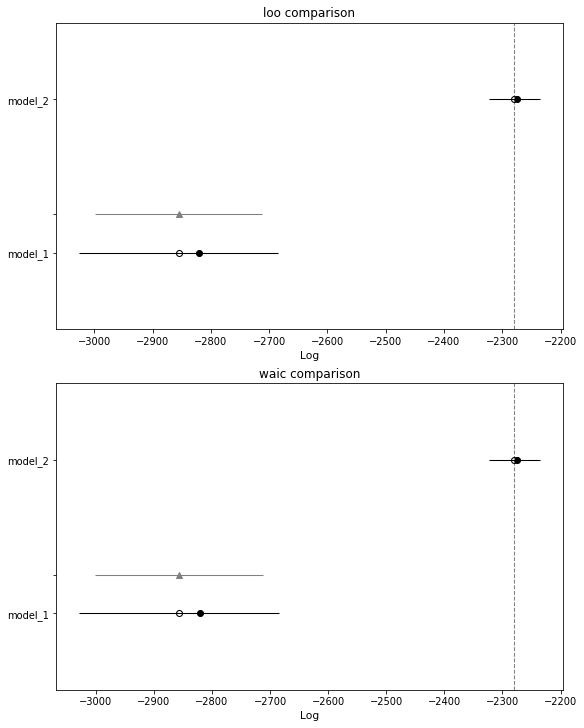

In [44]:
fig, ax = plt.subplots(2, 1, figsize=(8, 10), constrained_layout=True)
az.plot_compare(models_loo, ax=ax[0])
az.plot_compare(models_waic, ax=ax[1])
ax[0].set_title("loo comparison")
ax[1].set_title("waic comparison")
plt.show()

In [49]:
%%writefile code_5.stan

data {
    int<lower=0> N;
    int<lower=1> K;
    array[N] real y;
    matrix[N, K] X;
}

parameters {
    real<lower=0> sigma;
    vector[K] beta;
}

transformed parameters {
    vector[N] mu;
    mu = X * beta;
}

model {
    y ~ normal(mu, sigma);
}

generated quantities {
    vector[N] log_lik;
    array[N] real y_hat;

    for (j in 1:N) {
        log_lik[j] = normal_lpdf(y[j] | mu[j], sigma);
        y_hat[j] = normal_rng(mu[j], sigma);
    }
}

Overwriting code_5.stan


In [61]:
y = df_2.loc[:, 'y[1]': f'y[{N}]'].values.reshape((N,))
X_1 = df_2.loc[:, 'X[1,1]': f'X[{N},1]'].values.reshape((N,1))
X_2 = df_2.loc[:, 'X[1,1]': f'X[{N},2]'].values.reshape((N,2))
X_3 = df_2.loc[:, 'X[1,1]': f'X[{N},3]'].values.reshape((N,3))

In [62]:
data_pred_1 = {
    'N': N,
    'K': 1,
    'y': y,
    'X': X_1
}
data_pred_2 = {
    'N': N,
    'K': 2,
    'y': y,
    'X': X_2
}
data_pred_3 = {
    'N': N,
    'K': 3,
    'y': y,
    'X': X_3
}

In [50]:
model_pred = CmdStanModel(stan_file="code_5.stan")

INFO:cmdstanpy:compiling stan file /home/labs/DataAnalytics2023/Lab6/code_5.stan to exe file /home/labs/DataAnalytics2023/Lab6/code_5


INFO:cmdstanpy:compiled model executable: /home/labs/DataAnalytics2023/Lab6/code_5


In [63]:
pred_1_fit = model_pred.sample(data=data_pred_1,
                               seed=16072023)
pred_2_fit = model_pred.sample(data=data_pred_2,
                               seed=16072023)
pred_3_fit = model_pred.sample(data=data_pred_3,
                               seed=16072023)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status
chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)







chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)




chain 1 |██████▊   | 00:03 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:04 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:05 Iteration: 1400 / 2000 [ 70%]  (Sampling)




chain 1 |████████▏ | 00:06 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:06 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:07 Iteration: 1700 / 2000 [ 85%]  (Sampling)
chain 1 |█████████▌| 00:07 Iteration: 1800 / 2000 [ 90%]  (Sampling)
chain 1 |██████████| 00:08 Iteration: 190


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)




chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)
chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)





chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)





chain 1 |██████▊   | 00:03 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:04 Iteration: 1300 / 2000 [ 65%]  (Sampling)

chain 1 |███████▋  | 00:04 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:05 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:06 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:06 Iteration: 1700 / 2000 [ 85%]  (Sampling)

chain 1 |█████████▌| 00:07 Iteration: 1800 


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status




chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)








chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▊   | 00:02 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:03 Iteration: 1300 / 2000 [ 65%]  (Sampling)

chain 1 |███████▋  | 00:03 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:04 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:05 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:06 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:06 Iteration: 180


INFO:cmdstanpy:CmdStan done processing.


In [64]:
inf_data_to_comp = {
    'model_k_1': az.from_cmdstanpy(pred_1_fit),
    'model_k_2': az.from_cmdstanpy(pred_2_fit),
    'model_k_3': az.from_cmdstanpy(pred_3_fit)
}

In [66]:
model_ks_loo = az.compare(compare_dict=inf_data_to_comp,
                          ic='loo')
model_ks_waic = az.compare(compare_dict=inf_data_to_comp,
                          ic='loo')

In [67]:
model_ks_loo

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
model_k_1,0,-2699.716442,2.113761,0.000000,1.000000e+00,28.142088,0.000000,False,log
model_k_2,1,-3530.476228,3.047877,830.759786,2.915074e-11,27.605473,31.829299,False,log
model_k_3,2,-3531.566246,4.249837,831.849804,0.000000e+00,27.741474,31.739092,False,log


In [68]:
model_ks_waic

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
model_k_1,0,-2699.716442,2.113761,0.000000,1.000000e+00,28.142088,0.000000,False,log
model_k_2,1,-3530.476228,3.047877,830.759786,2.915074e-11,27.605473,31.829299,False,log
model_k_3,2,-3531.566246,4.249837,831.849804,0.000000e+00,27.741474,31.739092,False,log


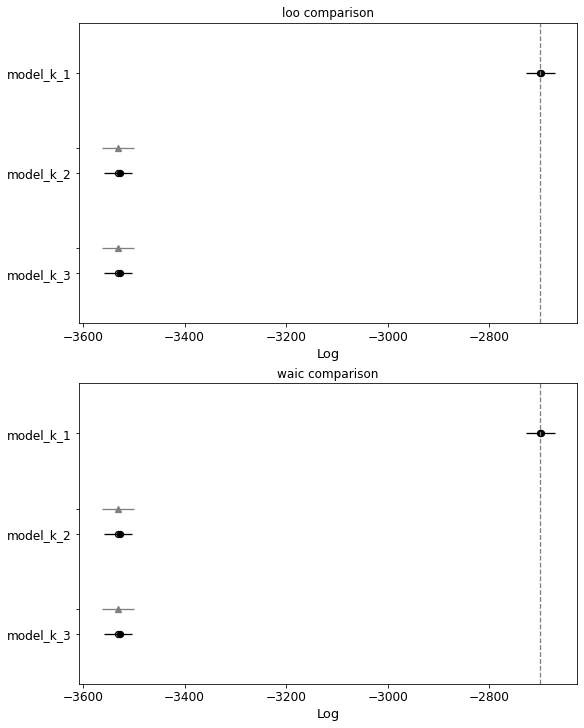

In [69]:
fig, ax = plt.subplots(2, 1, figsize=(8, 10), constrained_layout=True)
az.plot_compare(model_ks_loo, ax=ax[0])
az.plot_compare(model_ks_waic, ax=ax[1])
ax[0].set_title('loo comparison')
ax[1].set_title('waic comparison')
plt.show()